#Clothing Apprarel Classification


In [29]:
# Import needed libraries
import numpy as np
from keras.datasets import fashion_mnist



```
Using Tensorflow as our Backend
```



In [8]:
# Load fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
# Explore the dataset
# Checking shape /size of each train and their test
print("Number of samples/observations in training data: " + str(len(x_train)))
print("Number of labels in training data: " + str(len(y_train)))
print("Dimensions of single image in x_train: " + str(x_train[0].shape))
print("---------------------------------------------------------------------")
print("Number of samples/observations in test data: " + str(len(x_test)))
print("Number of labels in test data: " + str(len(y_test)))
print("Dimensions of single image in x_test: " + str(x_test[0].shape))

Number of samples/observations in training data: 60000
Number of labels in training data: 60000
Dimensions of single image in x_train: (28, 28)
---------------------------------------------------------------------
Number of samples/observations in test data: 10000
Number of labels in test data: 10000
Dimensions of single image in x_test: (28, 28)


#View Sample Images


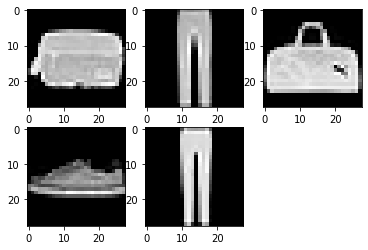

In [10]:
# Visualization library to visualize images
import matplotlib.pyplot as plt

# Plotting 5 images, Subplot arguments represents nrows, ncols, and index
# Color map is set to grey since our image dataset will be greyscale
plt.subplot(231)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(232)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(233)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(234)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(235)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

# Visualize the images
plt.show()

In [11]:
# Import necessary keras specific libraries
from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K

# Setting Training Parameters like batch_size and epochs
batch_size = 128
epochs = 100

# Storing numbers from rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

# Data being put into the right shape as it is required by Keras means to change the dimension of (60000, 28, 28) to (60000, 28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Store the shape of single image
input_shape = (img_rows, img_cols, 1)

# Change the image type to a float32 type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Change the range from (0 - 255) to (0 - 1)
x_train /= 255
x_test /= 255

# Hot encoding performed
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Number of pixls and classes calculated
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

# CNN Model is created here
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                        

#Time To Train the Model

In [12]:
model_fitting = model.fit(x_train, y_train,
                          batch_size = batch_size,
                          epochs = epochs,
                          verbose = 1,
                          validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss: ', score[0])
print('Test accuracy', score[1])

Epoch 1/100
469/469 [==============================] - 14s 12ms/step - loss: 2.5697 - accuracy: 0.2751 - val_loss: 1.4846 - val_accuracy: 0.5152
Epoch 2/100
469/469 [==============================] - 5s 11ms/step - loss: 1.5764 - accuracy: 0.5036 - val_loss: 0.8846 - val_accuracy: 0.6986
Epoch 3/100
469/469 [==============================] - 5s 11ms/step - loss: 1.2684 - accuracy: 0.5960 - val_loss: 0.7704 - val_accuracy: 0.7319
Epoch 4/100
469/469 [==============================] - 5s 10ms/step - loss: 1.1040 - accuracy: 0.6445 - val_loss: 0.7023 - val_accuracy: 0.7552
Epoch 5/100
469/469 [==============================] - 5s 11ms/step - loss: 1.0021 - accuracy: 0.6748 - val_loss: 0.6563 - val_accuracy: 0.7715
Epoch 6/100
469/469 [==============================] - 5s 11ms/step - loss: 0.9383 - accuracy: 0.6923 - val_loss: 0.6233 - val_accuracy: 0.7810
Epoch 7/100
469/469 [==============================] - 5s 10ms/step - loss: 0.8858 - accuracy: 0.7099 - val_loss: 0.5985 - val_accuracy

In [14]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# Change the directory to current working directory
import os
os.chdir("/content/drive/My Drive/Colab Notebooks")

In [32]:
# Save the model with a name needed to upload
model.save('clothing_classification.h5')